# Rice Type Classification using PyTorch

## Introduction
This project classifies rice types (**class 0** or **class 1**) using a neural network built with **PyTorch**. The goal is to learn a simple yet effective model that can distinguish between different rice varieties based on their physical characteristics.

---

## Dataset
- **Source**: [Kaggle - Rice Type Classification Dataset](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification)
- **Features**: The dataset consists of **10 numerical features** such as:
  - Length
  - Width
  - Area
  - Perimeter
  - and more...

These features are used to predict the **rice type label** (0 or 1).

---

## Results
- **Test Accuracy**: Achieved **99.08%** accuracy on the test set using the trained neural network.
- Model was trained using standard train-validation-test split and optimized using **Binary Cross-Entropy Loss**.

---

## Visualizations

### 1. Accuracy and Loss Curves
Two plots showing the training and validation losses and accuracy.


### 2. Confusion Matrix
A confusion matrix was generated to evaluate classification performance:



---

## Summary
This project demonstrates how deep learning (even with a simple model) can effectively classify rice types based on physical attributes. Visualizations and metrics help validate model performance.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

##Installing the opendatasets to download the dataset from kaggle


In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/mssmartypants/rice-type-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: puneetgarg2601
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification


100%|██████████| 888k/888k [00:00<00:00, 956MB/s]

##Importing the necessart libraries and functionalities

In [26]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Reading the data

In [27]:
data = pd.read_csv('/content/rice-type-classification/riceClassification.csv')

In [28]:
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [29]:
data.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


###Remove na values from the dataset


In [30]:
data.dropna(inplace=True)

In [31]:
data

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


###Removing the id column

In [32]:
data.drop(['id'], axis=1, inplace=True)

In [33]:
data


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [34]:
data.shape

(18185, 11)

In [35]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [36]:
data.shape

(18185, 11)

###Making the copy of the dataset so as to classify the new rice features after training the model

In [37]:
original_df = data.copy()

In [38]:
for column in data.columns:
  data[column] = data[column]/ data[column].max()

In [17]:
data['Class'] = data['Class'].astype('Int64')

In [39]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.573262,0.811219,0.618156,0.971489,0.545785,0.757140,0.562384,0.654774,0.733291,0.744543,0.0
18181,0.742899,0.925674,0.704314,0.971683,0.709121,0.861916,0.730296,0.758107,0.708884,0.745661,0.0
18182,0.623408,0.844800,0.640916,0.972058,0.593296,0.789562,0.633098,0.673049,0.754720,0.747830,0.0
18183,0.583741,0.826356,0.623551,0.972748,0.562227,0.764030,0.555396,0.675248,0.702103,0.751874,0.0


###Splitting the dataset into inputs and labels

In [40]:
X = data.iloc[:, :-1].to_numpy()
y = data.iloc[:, -1].to_numpy()

In [41]:
print(X.shape)
print(y.shape)

(18185, 10)
(18185,)


###Splitting the data into train, val, test in the ratio of 0.7, 0.15 and 0.15 respectively

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [43]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5)

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

###Defining the custom dataset

In [53]:
class dataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.y = torch.tensor(y, dtype = torch.float32).to(device)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [54]:
train_dataset = dataset(X_train, y_train )
test_dataset = dataset(X_test, y_test )
val_dataset = dataset(X_val, y_val)

In [55]:
train_dataloader = DataLoader(train_dataset, batch_size = 16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = 16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size = 16, shuffle=True)

In [56]:
for x, y in train_dataloader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([16, 10])
torch.Size([16])


###Defining our model

In [57]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(10, 64)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(64, 32)
    self.layer3 = nn.Linear(32, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.relu(self.layer1(x))
    x = self.relu(self.layer2(x))
    x = self.sigmoid(self.layer3(x))
    return x

In [58]:
model = MyModel().to(device)
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=1e-3)

###See the summary of the model

In [59]:
summary(model, input_size=X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 16, 64]             704
              ReLU-2               [-1, 16, 64]               0
            Linear-3               [-1, 16, 32]           2,080
              ReLU-4               [-1, 16, 32]               0
            Linear-5                [-1, 16, 1]              33
           Sigmoid-6                [-1, 16, 1]               0
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.01
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


###Training and validation checks

In [60]:
train_loss_plot = []
val_loss_plot = []
train_acc_plot = []
val_acc_plot = []
for epoch in range(10):
  train_loss = 0
  val_loss = 0
  train_acc = 0
  val_acc = 0
  model.train()
  for X, y in train_dataloader:
    optimizer.zero_grad()
    prediction = model(X).squeeze(1)
    loss = criterion(prediction, y)
    train_loss += loss.item()
    train_acc += ((prediction.round() == y).sum().item())
    loss.backward()
    optimizer.step()


  model.eval()
  with torch.no_grad():
    for X, y in val_dataloader:
      prediction = model(X).squeeze(1)
      loss = criterion(prediction, y)
      val_loss += loss.item()
      val_acc += ((prediction.round() == y).sum().item())

  train_loss_plot.append(train_loss/len(train_dataloader))
  val_loss_plot.append(val_loss/len(val_dataloader))
  train_acc_plot.append(train_acc/len(train_dataset))
  val_acc_plot.append(val_acc/len(val_dataset))

  print(f'Epoch: {epoch+1}')
  print(f'Train Loss: {train_loss/len(train_dataset)} || Val Loss: {val_loss/len(val_dataset)}')
  print(f'Train Acc: {(train_acc/len(train_dataset))*100} || Val Acc: {(val_acc/len(val_dataset))*100}')





Epoch: 1
Train Loss: 0.01339336828463952 || Val Loss: 0.003903476425697153
Train Acc: 92.40317385497683 || Val Acc: 97.83724340175954
Epoch: 2
Train Loss: 0.0029053174500532964 || Val Loss: 0.0031947149227109064
Train Acc: 98.35807997486056 || Val Acc: 98.38709677419355
Epoch: 3
Train Loss: 0.002688046917604643 || Val Loss: 0.002765761333622026
Train Acc: 98.55448189174327 || Val Acc: 98.64369501466275
Epoch: 4
Train Loss: 0.0026597995234792587 || Val Loss: 0.003118367122893858
Train Acc: 98.54662581506796 || Val Acc: 98.35043988269796
Epoch: 5
Train Loss: 0.0026961023193181615 || Val Loss: 0.002768859851743843
Train Acc: 98.51520150836673 || Val Acc: 98.68035190615836
Epoch: 6
Train Loss: 0.0025803862657895584 || Val Loss: 0.0028317438675931525
Train Acc: 98.64089873517166 || Val Acc: 98.71700879765396
Epoch: 7
Train Loss: 0.0025975769089969995 || Val Loss: 0.0027962514108036307
Train Acc: 98.5780501217692 || Val Acc: 98.75366568914956
Epoch: 8
Train Loss: 0.002514744649062075 || Val 

###Visualize the trained model loss and accuracy

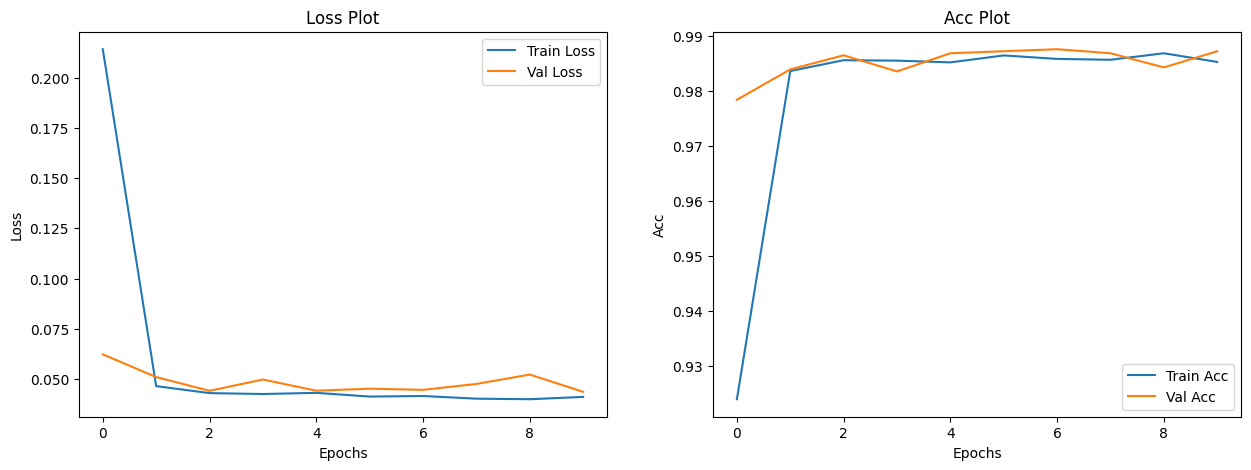

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_loss_plot, label = "Train Loss")
ax[0].plot(val_loss_plot, label = "Val Loss")
ax[0].set_title("Loss Plot")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[1].plot(train_acc_plot, label = "Train Acc")
ax[1].plot(val_acc_plot, label = "Val Acc")
ax[1].set_title("Acc Plot")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Acc")
ax[1].legend()
plt.show()


In [62]:
model.eval()
test_acc = 0
test_loss = 0
with torch.no_grad():
  for X, y in test_dataloader:
    prediction = model(X).squeeze(1)
    loss = criterion(prediction, y)
    test_loss += loss.item()
    test_acc += ((prediction.round() == y).sum().item())
  print(f'Test Loss: {test_loss/len(test_dataset)} || Test Acc: {(test_acc/len(test_dataset))*100}')

Test Loss: 0.0019354368629361791 || Test Acc: 99.08357771260997


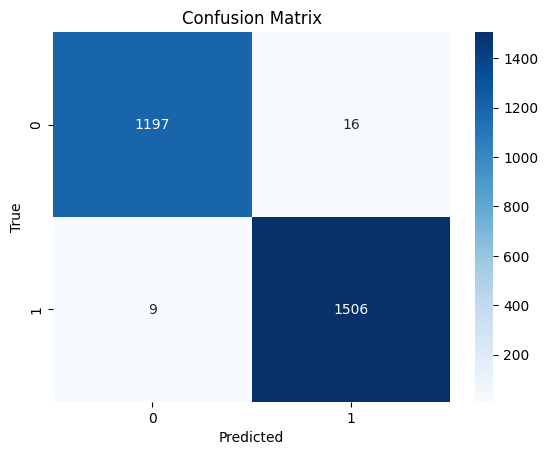

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model.eval()
predictions = []
true_labels = []
with torch.no_grad():
    for X, y in test_dataloader:
        prediction = model(X).squeeze(1).round().cpu().numpy()
        predictions.extend(prediction)
        true_labels.extend(y.cpu().numpy())
cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# torch.save(model.state_dict(), 'rice_classifier.pt')